## **Revisão — O que é um Teste de Hipótese**

**Conceito:**

Um teste de hipótese é um procedimento estatístico usado para decidir, com base em dados amostrais, se há evidências suficientes para rejeitar uma suposição (hipótese nula).

- Hipótese nula (H₀): não há efeito ou diferença.

- Hipótese alternativa (H₁): há efeito ou diferença.

- p-value: probabilidade de observar um resultado igual ou mais extremo que o obtido, assumindo H₀ verdadeira.

**Exemplo:**

H₀: a média das alturas dos alunos = 1.70m
H₁: a média ≠ 1.70m

**Interpretação de p-value**

p < 0.05 → há evidência contra H₀ (rejeita-se H₀).

p ≥ 0.05 → não há evidência suficiente (mantém-se H₀).

Atenção:
p-value não mede a probabilidade de H₀ ser verdadeira, e sim o quão raro seria observar esses dados assumindo H₀.

**Erros tipo I e tipo II**

Conceito geral

Quando fazemos um teste de hipótese, temos duas possibilidades:

    - H₀ (hipótese nula): não há efeito ou diferença (ex: dois grupos têm a mesma média).

    - H₁ (hipótese alternativa): há efeito ou diferença.

Mas qualquer teste pode errar sua conclusão, e esses erros são classificados em tipo I e tipo II.

**Erro Tipo I (α)**

Definição: rejeitar H₀ quando ela é verdadeira.

É o famoso “falso positivo”.

Representa a probabilidade de encontrar um efeito que não existe.

Exemplo prático:

Imagine um teste de medicamento:

    - H₀: o remédio não tem efeito.

    - H₁: o remédio tem efeito.

    Se, por acaso, os dados mostrarem uma diferença por sorte, e você rejeitar H₀, comete erro tipo I.

Probabilidade típica: α = 0,05 → aceitamos 5% de risco de falso positivo.

**Erro Tipo II (β)**

Definição: não rejeitar H₀ quando H₁ é verdadeira.

É o “falso negativo”.

Representa a probabilidade de não detectar um efeito real.

Exemplo:

O remédio realmente funciona, mas o estudo tem poucos pacientes ou muita variabilidade → o teste não detecta o efeito → erro tipo II.

Probabilidade típica: β é complementado pelo poder do teste (1 − β).

Um poder de 0,8 (80%) é considerado bom → significa 20% de risco de erro tipo II.


**Resumo**

- Erro tipo I (α): ver um efeito que não existe (falso positivo).

- Erro tipo II (β): não ver um efeito que existe (falso negativo).

- Poder do teste (1 − β): capacidade de detectar um efeito real.

- O equilíbrio entre os dois depende de:

    - Tamanho da amostra

    - Variabilidade dos dados

    - Magnitude do efeito

    - Nível de significância (α)


**Forma Mais resumida**

**Hipótese nula (H₀)**

    - É a suposição inicial: “nada mudou” ou “não há efeito real”.

    - Exemplo: o novo remédio não altera a pressão arterial.

**Hipótese alternativa (H₁)**

    - É o oposto de H₀: existe diferença ou efeito real.

    - Exemplo: o remédio altera a pressão arterial.

**Rejeitar ou não rejeitar H₀**

    - Nos testes estatísticos, usamos o valor-p (p-value) para decidir:

    - Se p < 0,05 → rejeitamos H₀ → há evidência de que existe um efeito real.

    - Se p ≥ 0,05 → não rejeitamos H₀ → não há evidência suficiente de efeito (mas isso não prova que H₀ é verdadeira).

Exemplo:

    - Se p = 0.03 → rejeita H₀ → o remédio provavelmente muda a pressão.
    - Se p = 0.20 → não rejeita H₀ → não temos provas de que o remédio faz diferença.

**Resumo prático**

    - H₀ → “nada acontece”
    - H₁ → “algo acontece”
    -   Rejeitar H₀ → há evidências de mudança
    - Não rejeitar H₀ → não há evidências suficientes (mas não quer dizer que seja falsa)

In [ ]:
!pip install pingouin

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
from scipy import stats

In [5]:
np.random.seed(42)

data = pd.DataFrame({
    'curso': np.repeat(['Engenharia', 'Psicologia', 'Educação Física'], 30),
    'altura': np.concatenate([
        np.random.normal(175, 6, 30), # média 175, desvio padrão 6 e 30 registros
        np.random.normal(168, 5, 30), # média 168, desvio padrão 5 e 30 registros
        np.random.normal(178, 7, 30) # média 178, desvio padrão 7 e 30 registros
    ])
})

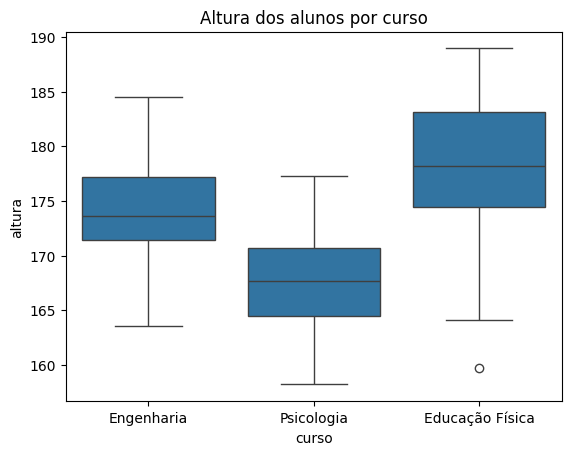

In [6]:
sns.boxplot(x='curso', y='altura', data=data)
plt.title('Altura dos alunos por curso')
plt.show()

In [8]:
data.sample(5)

,curso,altura
41,Psicologia,168.856841
35,Psicologia,161.895782
49,Psicologia,159.184799
52,Psicologia,164.615390
65,Educação Física,187.493680


## **Normalidade e Homocedasticidade**

Antes de aplicar testes paramétricos, verificamos se:

- Os dados seguem distribuição normal;

- As variâncias são homogêneas.

Por quê? Muitos testes (como o t de Student e ANOVA) assumem normalidade dos dados.

    - Teste usado: Shapiro-Wilk (ou Kolmogorov–Smirnov, Anderson-Darling, etc.).

    - Interpretação:

        - p > 0.05 → dados normais
        - p < 0.05 → dados não normais


A homocedasticidade indica que as variâncias dos grupos comparados são semelhantes.

    - É uma suposição dos testes paramétricos como o t de Student (para variâncias iguais) e ANOVA.

    - Teste usado: Levene ou Bartlett.

    - Interpretação:

        - p > 0.05 → variâncias iguais (homocedásticas)

        - p < 0.05 → variâncias diferentes (heterocedásticas)

In [16]:
# Teste de Normalidade
for c in data['curso'].unique():
    stat, p = stats.shapiro(data[data['curso'] == c]['altura'])
    print(f'{c}: p={p:.3f} {"(normal)" if p > 0.05 else "(não normal)"}')

Engenharia: p=0.687 (normal)
Psicologia: p=0.913 (normal)
Educação Física: p=0.365 (normal)


In [17]:
# Teste de homocedasticidade
stat, p = stats.levene(
    data.loc[data['curso'] == 'Engenharia', 'altura'],
    data.loc[data['curso'] == 'Psicologia', 'altura'],
    data.loc[data['curso'] == 'Educação Física', 'altura']
)
print(f'Homocedasticidade: p={p:.3f} {"(Variâncias Iguais)" if p>0.05 else "(Variâncias Diferentes)"}')

Homocedasticidade: p=0.222 (Variâncias Iguais)


## **Teste T de Student (2 grupos)**

Compara a média de dois grupos para verificar se há diferença estatística entre eles.
Tipos principais:

    - t de uma amostra: compara a média com um valor conhecido.

    - t independente: compara médias de dois grupos diferentes.

    - t pareado: compara antes/depois no mesmo grupo.

Pressupostos: normalidade e homocedasticidade.

**Interpretação:**

- p < 0.05 → diferença significativa entre as médias.
- p ≥ 0.05 → não há diferença significativa.

In [18]:
eng = data[data['curso']=='Engenharia']['altura']
psi = data[data['curso']=='Psicologia']['altura']
ed  = data[data['curso']=='Educação Física']['altura']

t_stats, p = stats.ttest_ind(eng, psi)
print(f'Engenharia x Psicologia: t={t_stats:.3f}, p={p:.3f}')

Engenharia x Psicologia: t=4.976, p=0.000


In [19]:
t_stats, p = stats.ttest_ind(eng, ed)
print(f'Engenharia x Educação Física: t={t_stats:.3f}, p={p:.3f}')

Engenharia x Educação Física: t=-2.627, p=0.011


In [20]:
t_stats, p = stats.ttest_ind(psi, ed)
print(f'Psicologia x Educação Física: t={t_stats:.3f}, p={p:.3f}')

Psicologia x Educação Física: t=-7.008, p=0.000


## **Teste de Hipótese para múltiplos grupos (ANOVA)**

Extensão do teste t para três ou mais grupos.
Avalia se há diferença significativa entre as médias.

    - H₀: todas as médias são iguais.

    - H₁: pelo menos uma média é diferente.

    Se o resultado for significativo (p < 0.05), aplicamos um teste post-hoc (como Tukey) para descobrir quais grupos diferem.

**Pressupostos:** normalidade, homocedasticidade e independência das amostras.


In [21]:
anova = stats.f_oneway(
    data[data['curso']=='Engenharia']['altura'],
    data[data['curso']=='Psicologia']['altura'],
    data[data['curso']=='Educação Física']['altura']
)
print(f'ANOVA: F={anova.statistic:.3f}, p={anova.pvalue:.3f}')

ANOVA: F=26.373, p=0.000


## **Teste Post-hoc (Tukey HSD)**

Após uma ANOVA significativa, o teste de Tukey identifica quais pares de grupos apresentam diferenças estatísticas.
Ele controla o erro tipo I acumulado em múltiplas comparações.

    - H₀: as médias dos dois grupos são iguais.

    - Saída típica: média, diferença, p-value ajustado e intervalo de confiança.

In [22]:
pg.pairwise_tukey(data=data, dv='altura', between='curso')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Educação Física,Engenharia,178.090193,173.871119,4.219075,1.483627,2.843757,1.519704e-02,0.669494
1,Educação Física,Psicologia,178.090193,167.394188,10.696006,1.483627,7.209364,5.816548e-10,1.785863
2,Engenharia,Psicologia,173.871119,167.394188,6.476931,1.483627,4.365607,1.024204e-04,1.268029


## **Medidas de Tamanho de Efeito (Effect Size)**

Enquanto o p-value indica se existe diferença, o tamanho de efeito mostra quão grande é a diferença.

**Cohen’s d (para 2 grupos):**

    - 0.2 = pequeno   

    - 0.5 = médio

    - 0.8 = grande

**Eta² (para ANOVA):**

    - 0.01 = pequeno

    - 0.06 = médio

    - 0.14 = grande

Essas medidas ajudam a avaliar a relevância prática do resultado.

In [23]:
pg.compute_effsize(eng, psi, eftype='cohen') # Diferença forte (1.28)

np.float64(1.2847134593639156)

In [24]:
pg.compute_effsize(eng, ed, eftype='cohen') # Negativa, indica a direção, a diferença entre média e forte

np.float64(-0.6783030045766596)

In [25]:
pg.compute_effsize(ed, psi, eftype='cohen') # Muito forte

np.float64(1.809360729401735)

## **Teste de Qui-Quadrado de Pearson**

Usado para verificar associação entre variáveis categóricas (nominais).
Exemplo: curso × gênero.

    - H₀: as variáveis são independentes.

    - H₁: há associação entre elas.

O teste compara as frequências observadas com as esperadas sob independência.
Interpretação:

    - p < 0.05 → há relação entre as variáveis.

    - p > 0.05 → são independentes.

In [26]:
tab = pd.DataFrame({
    'curso': np.random.choice(['Engenharia', 'Psicologia', 'Sistemas da Informação'], 90),
    'modelo': np.random.choice(['EAD', 'presencial'], 90)
})

In [27]:
cont = pd.crosstab(tab['curso'], tab['modelo'])
chi2, p, dof, expected = stats.chi2_contingency(cont)
print(f'p={p:.3f}, Chi2={chi2:.3f}')

p=0.133, Chi2=4.033


## **Exercícios práticos**

1. Gere duas amostras de peso corporal (n=40 cada) com médias diferentes.

    - Teste a normalidade.

    - Aplique o teste t de Student.

    - Interprete o resultado.

2. Use 3 grupos com médias diferentes e faça uma ANOVA + Tukey.

3. Gere uma tabela 2x3 de variáveis categóricas e aplique o qui-quadrado de Pearson.

4. Calcule o tamanho de efeito (Cohen’s d) entre dois grupos.

5. Explique, em suas palavras, o que significa obter p=0.001 em um teste t.

# **Parte II**

## **Testes Não Paramétricos, Simulação de Monte Carlo, Bootstrapping**

## **Testes Não Paramétricos**

Os testes não paramétricos não exigem que os dados sigam distribuição normal nem variâncias iguais.
Eles usam postos (ranks) em vez de valores brutos — tornando-os mais robustos a outliers e distribuições assimétricas.

## **Teste Mann–Whitney U**

Uso: compara duas amostras independentes (equivalente ao t de Student independente).
Hipóteses:

    - H₀: as distribuições são iguais.

    - H₁: uma tende a ter valores maiores que a outra

- Interpretação:

    - p < 0.05 → há diferença significativa entre os grupos.

    - Não assume normalidade → ideal para dados assimétricos.

In [30]:
np.random.seed(42)
grupo_a = np.random.exponential(2, 30)
grupo_b = np.random.exponential(2.5, 30)

stat, p = stats.mannwhitneyu(grupo_a, grupo_b, alternative='two-sided')
print(f'Mann-Whitney U: p={p:.3f}')

Mann-Whitney U: p=0.201


## **Teste Wilcoxon (pareado)**

Uso: compara duas medições pareadas (antes e depois, ou medidas relacionadas).
Hipóteses:

    - H₀: as diferenças entre pares têm mediana zero.

    - H₁: há diferença na mediana das diferenças.

Interpretação:

    - p < 0.05 → mudança significativa entre as medições.

## **Teste Kruskal–Wallis**

Uso: compara 3 ou mais grupos independentes (alternativa à ANOVA).
Hipóteses:

    - H₀: todas as amostras vêm da mesma distribuição.

    - H₁: pelo menos um grupo difere.

Interpretação:

    - p < 0.05 → há diferença significativa entre os grupos.

## **Teste de Friedman**

Uso: compara 3 ou mais medições pareadas (ex: desempenho do mesmo grupo em 3 momentos).

**Hipóteses:**

    - H₀: as medianas são iguais entre os momentos.

    - H₁: pelo menos um momento difere.

Interpretação:

    - p < 0.05 → diferença significativa entre os momentos.

## **Simulação de Monte Carlo para Testes de Hipótese**

A simulação de Monte Carlo permite visualizar como o p-value se comporta quando H₀ é verdadeira ou falsa.
Isso ajuda a compreender erro tipo I e poder do teste.

**Distribuição de p-values sob H₀ verdadeira**

Interpretação:

    - Os p-values se distribuem de forma uniforme entre 0 e 1 quando H₀ é verdadeira → cerca de 5% dos testes geram falsos positivos (α = 0.05).

**Distribuição de p-values sob H₁ verdadeira**

Interpretação:

    - Os p-values se concentram perto de 0 → o teste tem poder alto para detectar diferença.

## **Bootstrapping**

O bootstrapping é uma técnica de reamostragem com reposição usada para estimar:

    - Intervalos de confiança (IC) de uma estatística (ex: média, mediana).

    - Distribuições empíricas sem pressupor normalidade.

**Exemplo: Intervalo de confiança da diferença de médias**

Interpretação:

    - Se o intervalo não contém 0, há evidência de diferença significativa.

    - O bootstrapping é não paramétrico, robusto a assimetrias e outliers.

**Visualizando a distribuição bootstrap**

Interpretação:

    - A distribuição mostra a incerteza empírica sobre a diferença de médias — é o equivalente moderno e mais intuitivo do teste t.

## **Exercícios**


**Testes Não Paramétricos**

1. Gere duas amostras assimétricas e aplique o teste Mann–Whitney para verificar se as medianas diferem.

    - Dica: use np.random.exponential.

2. Gere dados “antes” e “depois” de uma intervenção e aplique o Wilcoxon.

    - Interprete se houve redução significativa.

3. Crie três grupos com distribuições diferentes e aplique o Kruskal–Wallis.

    - Se houver diferença, explique o que isso significa.

4. Simule três momentos (início, meio e fim) e use o Friedman para testar se há melhora ao longo do tempo.

5. Faça uma comparação entre t-test e Mann–Whitney nos mesmos dados não normais.

    - Quais conclusões diferem?

**Simulação de Monte Carlo**

6.  Faça uma simulação com 10.000 iterações de um teste t sob H₀ verdadeira e conte quantas vezes p < 0.05.

    - Isso deve se aproximar de 5%.

7. Repita a simulação com H₁ verdadeira (diferença real de 0.8 na média) e estime o poder do teste (proporção de p < 0.05).

8. Plote os dois histogramas de p-values lado a lado e explique o comportamento sob H₀ e H₁.

**Bootstrapping**

9. Gere dois grupos de tamanhos diferentes (ex: n=20 e n=50).
Use bootstrapping para estimar o intervalo de confiança da diferença de médias.

    - O intervalo inclui 0? O que isso implica?

10. Use o mesmo método para calcular o IC 95% da mediana de uma amostra assimétrica (exponencial).

    - Compare com o IC da média — qual é mais estável?